In [1]:
import csv
import pandas as pd
import seaborn as sns; sns.set()
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc



In [2]:
def Remove_Outlier_Indices(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList


# Reading data
df_user_features = pd.read_csv('data_python/Tennis_Dataset_user_features.txt', sep='\t')
df_hashtag_features = pd.read_csv('data_python/Tennis_Dataset_hashtag_features.txt', sep='\t')
df_loc_features = pd.read_csv('data_python/Tennis_Dataset_loc_features.txt', sep='\t')
df_mention_features = pd.read_csv('data_python/Tennis_Dataset_mention_features.txt', sep='\t')
df_term_features = pd.read_csv('data_python/Tennis_Dataset_term_features.txt', sep='\t')


In [56]:
# function to draw boxplots.
def boxplots(df_final,file_name):
    fig, ax = plt.subplots(figsize=(5, 2.5))
    ax.set_yscale('log')

    ax.spines['bottom'].set_color('0')
    ax.spines['top'].set_color('0')
    ax.spines['right'].set_color('0')
    ax.spines['left'].set_color('0')
    sns.boxplot(x='category', y = "mi", data = df_final, palette = "Set1", ax=ax,showfliers=False)
    sns.set(style = "whitegrid")

    plt.rcParams["font.family"] = "courier"
    plt.rc('grid', linestyle=":", color='grey')
    plt.grid(True)
    plt.xlabel("")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.ylabel("Mutual Information")

    #plt.ylim(10e-12, 10e-10)
    plt.savefig(file_name, bbox_inches='tight')
    
    
# function to draw violinplot   
def scatter_plot(x, y, xmin, xmax, ymin, ymax, xlabel, file_name):
    fig, ax = plt.subplots(figsize=(5, 3))
    #ax = sns.kdeplot(x, y, n_levels = 20, cmap = "Purples_d")


    # Basic 2D density plot
    sns.set_style("white")
    sns.kdeplot(x, y)

    # Some features are characteristic of 2D: color palette and wether or not color the lowest range
    ax = sns.kdeplot(x, y, cmap="Blues", shade=True, shade_lowest=True, )

    #ax = sns.kdeplot(x, y, cmap="Reds", shade=True)

    plt.rcParams["font.family"] = "courier"
    plt.rc('grid', linestyle=":", color='grey')
    plt.grid(True)
    plt.xlabel(xlabel)
    #plt.xticks(rotation=30)
    plt.tight_layout()
    plt.ylabel("Mutual Information")


    ax.set(ylim=(ymin, ymax))
    ax.set(xlim=(xmin, xmax))
    ax.ticklabel_format( axis='y', style='sci', scilimits=None, useOffset=None, useLocale=None, useMathText=None)

    ax.tick_params(color='black', labelcolor='black')
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
    plt.savefig(file_name, bbox_inches='tight')
    
    
# function to draw scatter plot
def violinplot(df_final, ymin, ymax, file_name):
    fig, ax = plt.subplots(figsize=(5, 2.5))
    ax.set_yscale('log')

    ax.spines['bottom'].set_color('0')
    ax.spines['top'].set_color('0')
    ax.spines['right'].set_color('0')
    ax.spines['left'].set_color('0')
    sns.violinplot(x='category', y = "mi", data = df_final, palette = "Set1", ax=ax, scale='area',linewidth = 0.8)
    sns.set(style = "whitegrid")

    plt.rcParams["font.family"] = "courier"
    plt.rc('grid', linestyle=":", color='grey')
    plt.grid(True)
    plt.xlabel("")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.ylabel("Mutual Information")

    #plt.ylim(ymin, ymax)
    plt.savefig(file_name, bbox_inches='tight')

# -------------------------------------
#  1. user_favouritesCount
# -------------------------------------


In [57]:
df = df_user_features.drop(columns=['id1','id2','user1','user2','user3','user4','user5','user6','user_tweetCount',
                     'user_followersCount','user_friendsCount','user_hashtagCount']).sort_values('user_favouritesCount')

df1 = df[df['user_favouritesCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['user_favouritesCount'])
df1['category']='[0,10$^2$]'


df2 = df[df['user_favouritesCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['user_favouritesCount'])
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['user_favouritesCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['user_favouritesCount'])
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['user_favouritesCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['user_favouritesCount'])
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['user_favouritesCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['user_favouritesCount'])
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)
# -------------------------------------


## Boxplots

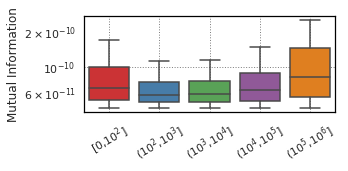

In [7]:
boxplots(df_final,"plots_python/Tennis_user_favouritesCount_boxplots.eps")

## Scatter plot with KDE

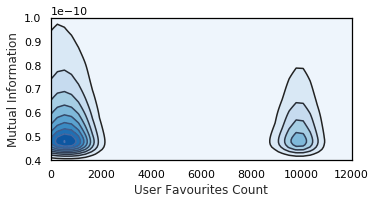

In [58]:
scatter = df
nonOutlierList = Remove_Outlier_Indices(scatter['mi'])
scatter = scatter[nonOutlierList].dropna()
nonOutlierList = Remove_Outlier_Indices(scatter['user_favouritesCount'])
scatter = scatter[nonOutlierList].dropna()

y = scatter['mi'].values
x = scatter['user_favouritesCount'].values

scatter_plot(x, y, 0, 12000, 0.4e-10, 1e-10, "User Favourites Count", 
             "plots_python/Tennis_user_favouritesCount_scatter.eps")

## Violinplot

In [9]:
df = df_user_features.drop(columns=['id1','id2','user1','user2','user3','user4','user5','user6','user_tweetCount',
                     'user_followersCount','user_friendsCount','user_hashtagCount']).sort_values('user_favouritesCount')

df1 = df[df['user_favouritesCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['user_favouritesCount'])
nonOutlierList = Remove_Outlier_Indices(df1)
df1 = df1[nonOutlierList].dropna()
df1['category']='[0,10$^2$]'


df2 = df[df['user_favouritesCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['user_favouritesCount'])
nonOutlierList = Remove_Outlier_Indices(df2)
df2 = df2[nonOutlierList].dropna()
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['user_favouritesCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['user_favouritesCount'])
nonOutlierList = Remove_Outlier_Indices(df3)
df3 = df3[nonOutlierList].dropna()
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['user_favouritesCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['user_favouritesCount'])
nonOutlierList = Remove_Outlier_Indices(df4)
df4 = df4[nonOutlierList].dropna()
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['user_favouritesCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['user_favouritesCount'])
nonOutlierList = Remove_Outlier_Indices(df5)
df5 = df5[nonOutlierList].dropna()
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)


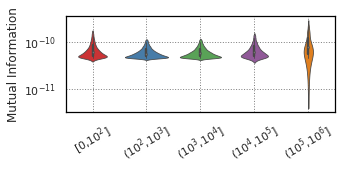

In [10]:
violinplot(df_final,0.05e-10, 0.4e-10,
           "plots_python/Tennis_user_favouritesCount_violinplots.eps")

# -------------------------------------
# 2. user_followersCount
# -------------------------------------

In [59]:
df = df_user_features.drop(columns=['id1','id2','user1','user2','user3','user4','user5','user6','user_tweetCount',
                     'user_favouritesCount','user_friendsCount','user_hashtagCount']).sort_values('user_followersCount')

df1 = df[df['user_followersCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['user_followersCount'])
df1['category']='[0,10$^2$]'

df2 = df[df['user_followersCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['user_followersCount'])
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['user_followersCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['user_followersCount'])
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['user_followersCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['user_followersCount'])
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['user_followersCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['user_followersCount'])
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)

## Boxplots

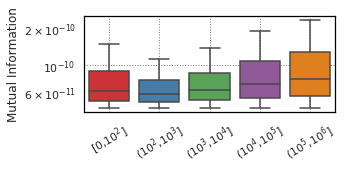

In [12]:
boxplots(df_final,"plots_python/Tennis_user_followersCount_boxplots.eps")

## Scatter plot with KDE

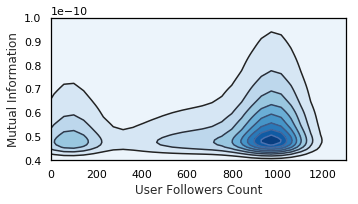

In [60]:
scatter = df
nonOutlierList = Remove_Outlier_Indices(scatter['mi'])
scatter = scatter[nonOutlierList].dropna()
nonOutlierList = Remove_Outlier_Indices(scatter['user_followersCount'])
scatter = scatter[nonOutlierList].dropna()

y = scatter['mi'].values
x = scatter['user_followersCount'].values

scatter_plot(x, y, 0, 1300, 0.4e-10, 1e-10, "User Followers Count", 
             "plots_python/Tennis_user_followersCount_scatter.eps")

## Violinplot

In [14]:
df = df_user_features.drop(columns=['id1','id2','user1','user2','user3','user4','user5','user6','user_tweetCount',
                     'user_favouritesCount','user_friendsCount','user_hashtagCount']).sort_values('user_followersCount')

df1 = df[df['user_followersCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['user_followersCount'])
nonOutlierList = Remove_Outlier_Indices(df1)
df1 = df1[nonOutlierList].dropna()
df1['category']='[0,10$^2$]'

df2 = df[df['user_followersCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['user_followersCount'])
nonOutlierList = Remove_Outlier_Indices(df2)
df2 = df2[nonOutlierList].dropna()
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['user_followersCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['user_followersCount'])
nonOutlierList = Remove_Outlier_Indices(df3)
df3 = df3[nonOutlierList].dropna()
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['user_followersCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['user_followersCount'])
nonOutlierList = Remove_Outlier_Indices(df4)
df4 = df4[nonOutlierList].dropna()
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['user_followersCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['user_followersCount'])
nonOutlierList = Remove_Outlier_Indices(df5)
df5 = df5[nonOutlierList].dropna()
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)

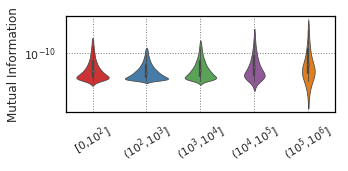

In [15]:
violinplot(df_final,0.05e-10, 0.4e-10,
           "plots_python/Tennis_user_followersCount_violinplots.eps")

# -------------------------------------
# 3. user_friendsCount
# -------------------------------------

In [61]:
df = df_user_features.drop(columns=['id1','id2','user1','user2','user3','user4','user5','user6','user_tweetCount',
                     'user_favouritesCount','user_followersCount','user_hashtagCount']).sort_values('user_friendsCount')

df1 = df[df['user_friendsCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['user_friendsCount'])
df1['category']='[0,10$^2$]'

df2 = df[df['user_friendsCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['user_friendsCount'])
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['user_friendsCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['user_friendsCount'])
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['user_friendsCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['user_friendsCount'])
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['user_friendsCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['user_friendsCount'])
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)

## Boxplots

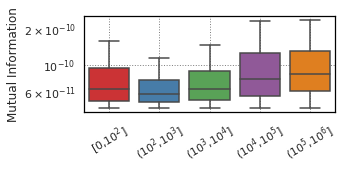

In [17]:
boxplots(df_final,"plots_python/Tennis_user_friendsCount_boxplots.eps")

## Scatter plot with KDE

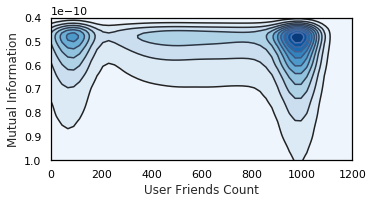

In [62]:
scatter = df
nonOutlierList = Remove_Outlier_Indices(scatter['mi'])
scatter = scatter[nonOutlierList].dropna()
nonOutlierList = Remove_Outlier_Indices(scatter['user_friendsCount'])
scatter = scatter[nonOutlierList].dropna()

y = scatter['mi'].values
x = scatter['user_friendsCount'].values

scatter_plot(x, y, 0, 1200, 1e-10, 0.4e-10, "User Friends Count", 
             "plots_python/Tennis_user_friendsCount_scatter.eps")

## Violinplot

In [19]:
df = df_user_features.drop(columns=['id1','id2','user1','user2','user3','user4','user5','user6','user_tweetCount',
                     'user_favouritesCount','user_followersCount','user_hashtagCount']).sort_values('user_friendsCount')

df1 = df[df['user_friendsCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['user_friendsCount'])
nonOutlierList = Remove_Outlier_Indices(df1)
df1 = df1[nonOutlierList].dropna()
df1['category']='[0,10$^2$]'


df2 = df[df['user_friendsCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['user_friendsCount'])
nonOutlierList = Remove_Outlier_Indices(df2)
df2 = df2[nonOutlierList].dropna()
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['user_friendsCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['user_friendsCount'])
nonOutlierList = Remove_Outlier_Indices(df3)
df3 = df3[nonOutlierList].dropna()
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['user_friendsCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['user_friendsCount'])
nonOutlierList = Remove_Outlier_Indices(df4)
df4 = df4[nonOutlierList].dropna()
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['user_friendsCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['user_friendsCount'])
nonOutlierList = Remove_Outlier_Indices(df5)
df5 = df5[nonOutlierList].dropna()
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)

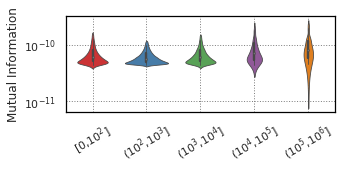

In [20]:
violinplot(df_final,0.05e-10, 0.4e-10,
           "plots_python/Tennis_user_friendsCount_violinplots.eps")

# -------------------------------------
# 4. user_hashtagCount
# -------------------------------------

In [63]:
df = df_user_features.drop(columns=['id1','id2','user1','user2','user3','user4','user5','user6','user_tweetCount',
                     'user_favouritesCount','user_followersCount','user_friendsCount']).sort_values('user_hashtagCount')

df1 = df[df['user_hashtagCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['user_hashtagCount'])
df1['category']='[0,10$^2$]'

df2 = df[df['user_hashtagCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['user_hashtagCount'])
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['user_hashtagCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['user_hashtagCount'])
df3['category']='(10$^3$,10$^4$]'

df_final = df1.append(df2).append(df3)

## Boxplots

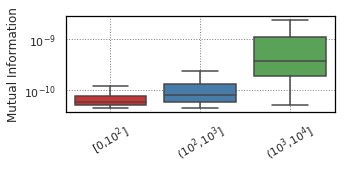

In [22]:
boxplots(df_final,"plots_python/Tennis_user_hashtagCount_boxplots.eps")

## Scatter plot with KDE

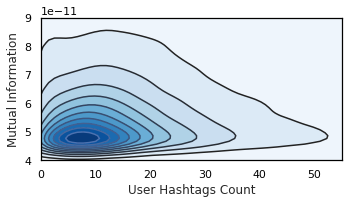

In [64]:
scatter = df
nonOutlierList = Remove_Outlier_Indices(scatter['mi'])
scatter = scatter[nonOutlierList].dropna()
nonOutlierList = Remove_Outlier_Indices(scatter['user_hashtagCount'])
scatter = scatter[nonOutlierList].dropna()

y = scatter['mi'].values
x = scatter['user_hashtagCount'].values
scatter_plot(x, y, 0, 55, 0.4e-10, 0.9e-10, "User Hashtags Count", 
             "plots_python/Tennis_user_hashtagCount_scatter.eps")

## Violinplot

In [24]:
df = df_user_features.drop(columns=['id1','id2','user1','user2','user3','user4','user5','user6','user_tweetCount',
                     'user_favouritesCount','user_followersCount','user_friendsCount']).sort_values('user_hashtagCount')

df1 = df[df['user_hashtagCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['user_hashtagCount'])
nonOutlierList = Remove_Outlier_Indices(df1)
df1 = df1[nonOutlierList].dropna()
df1['category']='[0,10$^2$]'

df2 = df[df['user_hashtagCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['user_hashtagCount'])
nonOutlierList = Remove_Outlier_Indices(df2)
df2 = df2[nonOutlierList].dropna()
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['user_hashtagCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['user_hashtagCount'])
nonOutlierList = Remove_Outlier_Indices(df3)
df3 = df3[nonOutlierList].dropna()
df3['category']='(10$^3$,10$^4$]'

df_final = df1.append(df2).append(df3)

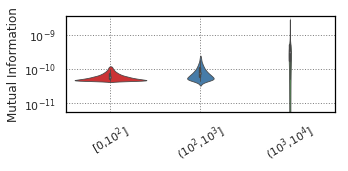

In [25]:
violinplot(df_final,0.05e-10, 2e-10,
           "plots_python/Tennis_user_hashtagCount_violinplots.eps")

# -------------------------------------
# 5. user_tweetCount
# -------------------------------------

In [65]:
df = df_user_features.drop(columns=['id1','id2','user1','user2','user3','user4','user5','user6','user_friendsCount',
                     'user_favouritesCount','user_followersCount','user_hashtagCount']).sort_values('user_tweetCount')

df2 = df[df['user_tweetCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['user_tweetCount'])
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['user_tweetCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['user_tweetCount'])
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['user_tweetCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['user_tweetCount'])
df4['category']='(10$^4$,10$^5$]'

df_final = df2.append(df3).append(df4)

## Boxplots

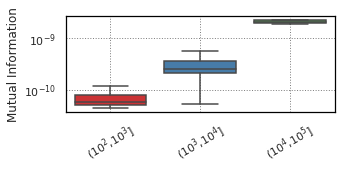

In [27]:
boxplots(df_final,"plots_python/Tennis_user_tweetCount_boxplots.eps")

## Scatter plot with KDE

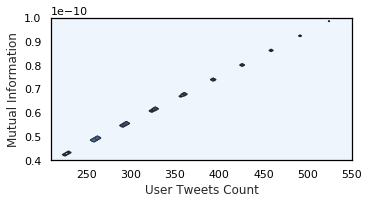

In [66]:
scatter = df
nonOutlierList = Remove_Outlier_Indices(scatter['mi'])
scatter = scatter[nonOutlierList].dropna()
nonOutlierList = Remove_Outlier_Indices(scatter['user_tweetCount'])
scatter = scatter[nonOutlierList].dropna()

y = scatter['mi'].values
x = scatter['user_tweetCount'].values

scatter_plot(x, y, 210, 550, 0.4e-10, 1e-10, "User Tweets Count", 
             "plots_python/Tennis_user_tweetCount_scatter.eps")

## Violinplot

In [29]:
df = df_user_features.drop(columns=['id1','id2','user1','user2','user3','user4','user5','user6','user_friendsCount',
                     'user_favouritesCount','user_followersCount','user_hashtagCount']).sort_values('user_tweetCount')

df2 = df[df['user_tweetCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['user_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df2)
df2 = df2[nonOutlierList].dropna()
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['user_tweetCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['user_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df3)
df3 = df3[nonOutlierList].dropna()
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['user_tweetCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['user_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df4)
df4 = df4[nonOutlierList].dropna()
df4['category']='(10$^4$,10$^5$]'

df_final = df2.append(df3).append(df4)

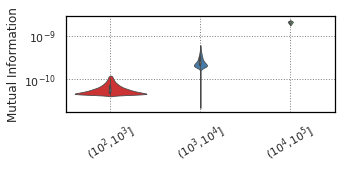

In [30]:
violinplot(df_final,0.05e-10, 10e-10,
           "plots_python/Tennis_user_tweetCount_violinplots.eps")

# -------------------------------------
# 6. hashtag_tweetCount
# -------------------------------------

In [77]:
df = df_hashtag_features.drop(columns=['id1','id2','hashtag1','hashtag2','hashtag3',
                     'hashtag_userCount']).sort_values('hashtag_tweetCount')

df1 = df[df['hashtag_tweetCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['hashtag_tweetCount'])
df1['category']='[0,10$^2$]'

df2 = df[df['hashtag_tweetCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['hashtag_tweetCount'])
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['hashtag_tweetCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['hashtag_tweetCount'])
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['hashtag_tweetCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['hashtag_tweetCount'])
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['hashtag_tweetCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['hashtag_tweetCount'])
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)


## Boxplots

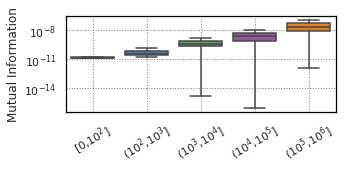

In [32]:
boxplots(df_final,"plots_python/Tennis_hashtag_tweetCount_boxplots.eps")

## Scatter plot with KDE


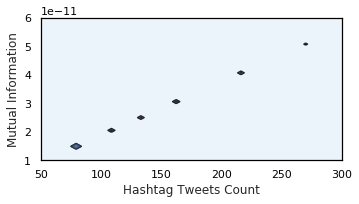

In [78]:
scatter = df
nonOutlierList = Remove_Outlier_Indices(scatter['mi'])
scatter = scatter[nonOutlierList].dropna()
nonOutlierList = Remove_Outlier_Indices(scatter['hashtag_tweetCount'])
scatter = scatter[nonOutlierList].dropna()

y = scatter['mi'].values
x = scatter['hashtag_tweetCount'].values

scatter_plot(x, y, 50, 300, 0.1e-10,0.6e-10, "Hashtag Tweets Count", 
             "plots_python/Tennis_hashtag_tweetCount_scatter.eps")

## Violinplot

In [34]:
df = df_hashtag_features.drop(columns=['id1','id2','hashtag1','hashtag2','hashtag3',
                     'hashtag_userCount']).sort_values('hashtag_tweetCount')

df1 = df[df['hashtag_tweetCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['hashtag_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df1)
df1 = df1[nonOutlierList].dropna()
df1['category']='[0,10$^2$]'

df2 = df[df['hashtag_tweetCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['hashtag_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df2)
df2 = df2[nonOutlierList].dropna()
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['hashtag_tweetCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['hashtag_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df3)
df3 = df3[nonOutlierList].dropna()
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['hashtag_tweetCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['hashtag_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df4)
df4 = df4[nonOutlierList].dropna()
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['hashtag_tweetCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['hashtag_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df5)
df5 = df5[nonOutlierList].dropna()
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)


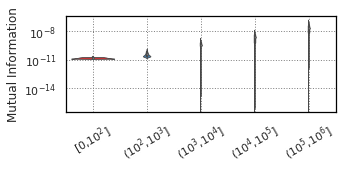

In [35]:
violinplot(df_final,0.01e-10, 10e-10,
           "plots_python/Tennis_hashtag_tweetCount_violinplots.eps")

# -------------------------------------
# 7. hashtag_userCount
# -------------------------------------

In [79]:
df = df_hashtag_features.drop(columns=['id1','id2','hashtag1','hashtag2','hashtag3',
                     'hashtag_tweetCount']).sort_values('hashtag_userCount')

df1 = df[df['hashtag_userCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['hashtag_userCount'])
df1['category']='[0,10$^2$]'

df2 = df[df['hashtag_userCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['hashtag_userCount'])
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['hashtag_userCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['hashtag_userCount'])
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['hashtag_userCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['hashtag_userCount'])
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['hashtag_userCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['hashtag_userCount'])
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)

## Boxplots

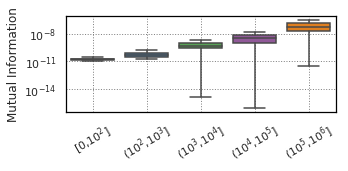

In [37]:
boxplots(df_final,"plots_python/Tennis_hashtag_userCount_boxplots.eps")

## Scatter plot with KDE

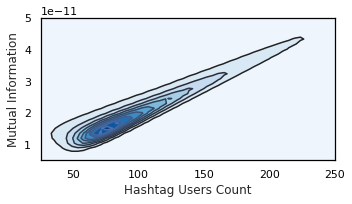

In [80]:
scatter = df
nonOutlierList = Remove_Outlier_Indices(scatter['mi'])
scatter = scatter[nonOutlierList].dropna()
nonOutlierList = Remove_Outlier_Indices(scatter['hashtag_userCount'])
scatter = scatter[nonOutlierList].dropna()

y = scatter['mi'].values
x = scatter['hashtag_userCount'].values

scatter_plot(x, y, 25, 250, 0.05e-10, 0.5e-10, "Hashtag Users Count", 
             "plots_python/Tennis_hashtag_userCount_scatter.eps")

## Violinplot

In [39]:
df = df_hashtag_features.drop(columns=['id1','id2','hashtag1','hashtag2','hashtag3',
                     'hashtag_tweetCount']).sort_values('hashtag_userCount')

df1 = df[df['hashtag_userCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['hashtag_userCount'])
nonOutlierList = Remove_Outlier_Indices(df1)
df1 = df1[nonOutlierList].dropna()
df1['category']='[0,10$^2$]'

df2 = df[df['hashtag_userCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['hashtag_userCount'])
nonOutlierList = Remove_Outlier_Indices(df2)
df2 = df2[nonOutlierList].dropna()
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['hashtag_userCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['hashtag_userCount'])
nonOutlierList = Remove_Outlier_Indices(df3)
df3 = df3[nonOutlierList].dropna()
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['hashtag_userCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['hashtag_userCount'])
nonOutlierList = Remove_Outlier_Indices(df4)
df4 = df4[nonOutlierList].dropna()
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['hashtag_userCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['hashtag_userCount'])
nonOutlierList = Remove_Outlier_Indices(df5)
df5 = df5[nonOutlierList].dropna()
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)

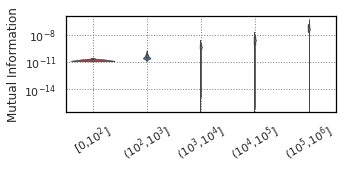

In [40]:
violinplot(df_final,10e-12, 10e-7,
           "plots_python/Tennis_hashtag_userCount_violinplots.eps")

# -------------------------------------
# 8. location_userCount
# -------------------------------------

In [87]:
df = df_loc_features.drop(columns=['id1','id2','location1','location2']).sort_values('location_userCount')

df1 = df[df['location_userCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['location_userCount'])
df1['category']='[0,10$^2$]'

df2 = df[df['location_userCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['location_userCount'])
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['location_userCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['location_userCount'])
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['location_userCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['location_userCount'])
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['location_userCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['location_userCount'])
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)

## Boxplots

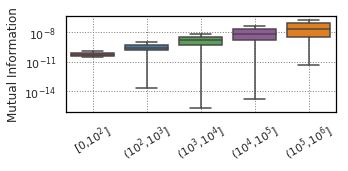

In [42]:
boxplots(df_final,"plots_python/Tennis_location_userCount_boxplots.eps")

## Scatter plot with KDE

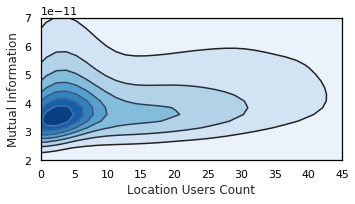

In [88]:
scatter = df
nonOutlierList = Remove_Outlier_Indices(scatter['mi'])
scatter = scatter[nonOutlierList].dropna()
nonOutlierList = Remove_Outlier_Indices(scatter['location_userCount'])
scatter = scatter[nonOutlierList].dropna()

y = scatter['mi'].values
x = scatter['location_userCount'].values

scatter_plot(x, y, 0, 45, 0.2e-10, 0.7e-10, "Location Users Count", 
             "plots_python/Tennis_location_userCount_scatter.eps")

## violinplot

In [44]:
df = df_loc_features.drop(columns=['id1','id2','location1','location2']).sort_values('location_userCount')

df1 = df[df['location_userCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['location_userCount'])
nonOutlierList = Remove_Outlier_Indices(df1)
df1 = df1[nonOutlierList].dropna()
df1['category']='[0,10$^2$]'

df2 = df[df['location_userCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['location_userCount'])
nonOutlierList = Remove_Outlier_Indices(df2)
df2 = df2[nonOutlierList].dropna()
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['location_userCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['location_userCount'])
nonOutlierList = Remove_Outlier_Indices(df3)
df3 = df3[nonOutlierList].dropna()
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['location_userCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['location_userCount'])
nonOutlierList = Remove_Outlier_Indices(df4)
df4 = df4[nonOutlierList].dropna()
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['location_userCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['location_userCount'])
nonOutlierList = Remove_Outlier_Indices(df5)
df5 = df5[nonOutlierList].dropna()
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)


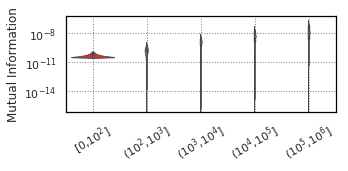

In [45]:
violinplot(df_final,10e-12, 10e-7,
           "plots_python/Tennis_location_userCount_violinplots.eps")

# -------------------------------------
# 9. mention_tweetCount
# -------------------------------------


In [91]:
df = df_mention_features.drop(columns=['id1','id2','mention1','mention2']).sort_values('mention_tweetCount')

df2 = df[df['mention_tweetCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['mention_tweetCount'])
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['mention_tweetCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['mention_tweetCount'])
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['mention_tweetCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['mention_tweetCount'])
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['mention_tweetCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['mention_tweetCount'])
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)

## Boxplots

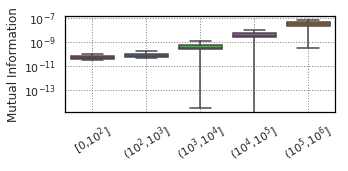

In [47]:
boxplots(df_final,"plots_python/Tennis_mention_tweetCount_boxplots.eps")

## Scatter plot with KDE

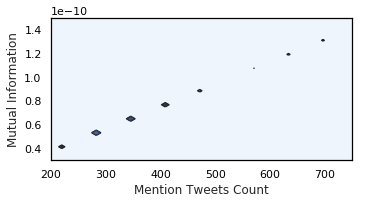

In [92]:
scatter = df
nonOutlierList = Remove_Outlier_Indices(scatter['mi'])
scatter = scatter[nonOutlierList].dropna()
nonOutlierList = Remove_Outlier_Indices(scatter['mention_tweetCount'])
scatter = scatter[nonOutlierList].dropna()

y = scatter['mi'].values
x = scatter['mention_tweetCount'].values

scatter_plot(x, y, 200, 750, 0.3e-10, 1.5e-10, "Mention Tweets Count", 
             "plots_python/Tennis_mention_tweetCount_scatter.eps")

## violinplot

In [49]:
df = df_mention_features.drop(columns=['id1','id2','mention1','mention2']).sort_values('mention_tweetCount')

df2 = df[df['mention_tweetCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['mention_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df2)
df2 = df2[nonOutlierList].dropna()
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['mention_tweetCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['mention_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df3)
df3 = df3[nonOutlierList].dropna()
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['mention_tweetCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['mention_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df4)
df4 = df4[nonOutlierList].dropna()
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['mention_tweetCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['mention_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df5)
df5 = df5[nonOutlierList].dropna()
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)


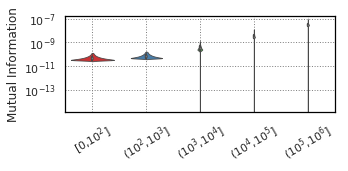

In [50]:
violinplot(df_final,10e-12, 10e-7,
           "plots_python/Tennis_mention_tweetCount_violinplots.eps")

# -------------------------------------
# 10. term_tweetCount
# -------------------------------------

In [89]:
df = df_term_features.drop(columns=['id1','id2','term1','term2']).sort_values('term_tweetCount')

df2 = df[df['term_tweetCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['term_tweetCount'])
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['term_tweetCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['term_tweetCount'])
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['term_tweetCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['term_tweetCount'])
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['term_tweetCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['term_tweetCount'])
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)

## Boxplots

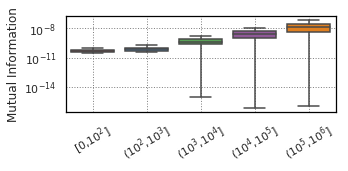

In [52]:
boxplots(df_final,"plots_python/Tennis_term_tweetCount_boxplots.eps")

## Scatter plot with KDE

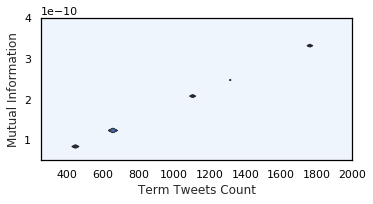

In [90]:
scatter = df
nonOutlierList = Remove_Outlier_Indices(scatter['mi'])
scatter = scatter[nonOutlierList].dropna()
nonOutlierList = Remove_Outlier_Indices(scatter['term_tweetCount'])
scatter = scatter[nonOutlierList].dropna()

y = scatter['mi'].values
x = scatter['term_tweetCount'].values

scatter_plot(x, y, 250, 2000, 0.5e-10, 4e-10, "Term Tweets Count", 
             "plots_python/Tennis_term_tweetCount_scatter.eps")


In [54]:
df = df_term_features.drop(columns=['id1','id2','term1','term2']).sort_values('term_tweetCount')

df2 = df[df['term_tweetCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['term_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df2)
df2 = df2[nonOutlierList].dropna()
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['term_tweetCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['term_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df3)
df3 = df3[nonOutlierList].dropna()
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['term_tweetCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['term_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df4)
df4 = df4[nonOutlierList].dropna()
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['term_tweetCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['term_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df5)
df5 = df5[nonOutlierList].dropna()
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)


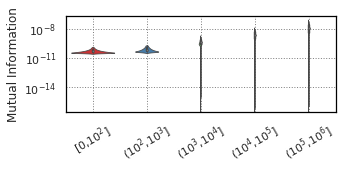

In [55]:
violinplot(df_final,10e-12, 10e-7,
           "plots_python/Tennis_term_tweetCount_violinplots.eps")